In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
import info

filename = 'learning_progress'
df = pd.read_csv(f'../results/{info.task}/{info.user}/{info.take}/learning_progress.tsv', sep='\t')

FileNotFoundError: [Errno 2] No such file or directory: '../data/learning_progress.tsv'

In [ ]:
# rename index col
df = df.rename(columns={'Unnamed: 0': 'index'})
df.head()

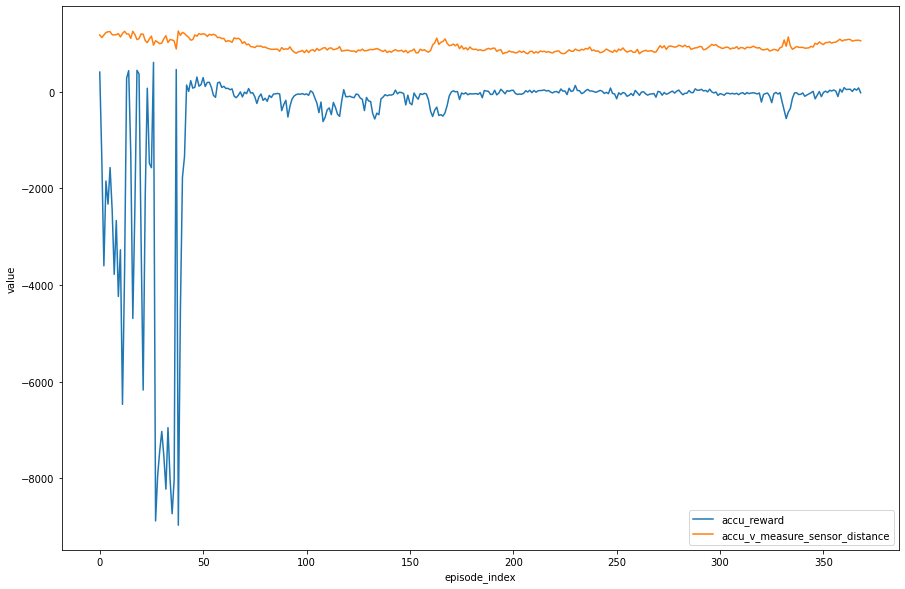

In [108]:

# group per episode and append to new df
_df = pd.DataFrame()
for k,v in df.groupby('episode_index'):
    _df = _df.append({'episode_index': int(k), 'accu_reward': v['accu_reward'].sum(), 'accu_v_measure_sensor_distance': v['accu_v_measure_sensor_distance'].sum()}, ignore_index=True)
    # print(k)

    
# plot 
fig, ax = plt.subplots(figsize=(15,10))
melt = _df.melt(id_vars='episode_index', value_vars=['accu_reward', 'accu_v_measure_sensor_distance'])
sns.lineplot(data=melt, x='episode_index', y='value', hue='variable')
plt.legend()
plt.savefig('../img/learning_rate_lineplot.png')

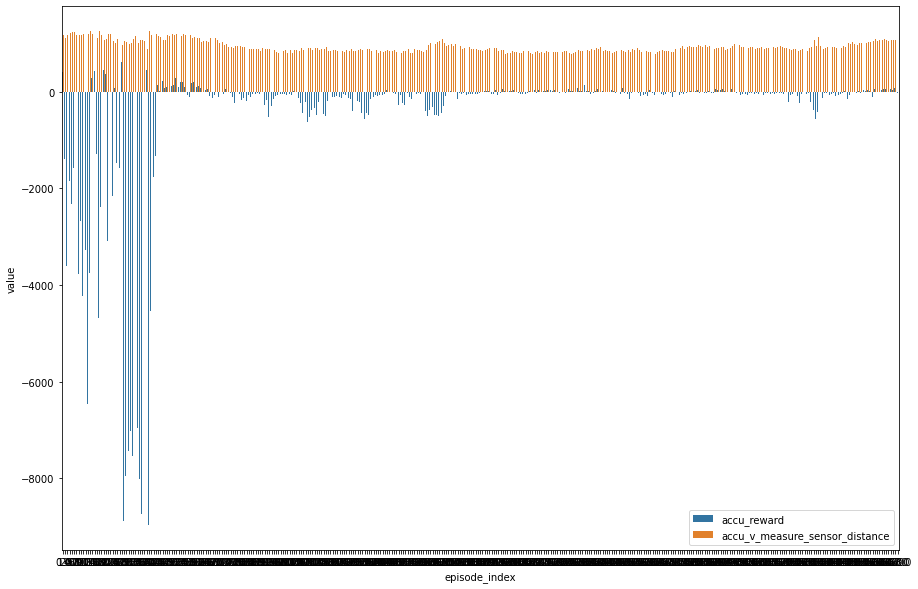

In [103]:
    
# plot 
fig, ax = plt.subplots(figsize=(15,10))
# melt = _df.melt(id_vars='episode_index', value_vars=['accu_reward', 'accu_v_measure_sensor_distance'])
sns.barplot(data=melt, x='episode_index', y='value', hue='variable')
plt.legend()
plt.savefig('../img/learning_rate_barplot.png')